In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# store map size (pixels)
STORE_SIZE = [3136, 2475] 

TRANSFORMED_DATA_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords_103.csv"
TRANSFORMED_DATA_SELECT_CAMS_PATH = "C:/Users/diogo/Desktop/Tese/Resultados/transformed_coords_selected_cameras.csv"
MAP_PATH = "C:/Users/diogo/Desktop/Tese/Dados/floorplan.png"
COLOR_PER_CAMERA = {"1.03": "Greys", "1.04": "Greens", "1.05": "Oranges", "2.05": "Blues", "2.11": "RdPu"}



In [5]:
df = pd.read_csv(TRANSFORMED_DATA_PATH)
df.head()

,Unnamed: 0.1,Unnamed: 0,xmin,ymin,xmax,ymax,confidence,class,name,xmin_track,...,frame_idx,Customer_id,time,x_frame,y_frame,x_floorplan,y_floorplan,camera,new_customer_id,new_frame_id
0,0,0,173.322418,298.714783,258.738098,476.472382,0.490883,0.0,person,173.0,...,1681,31.0,09:30:13,216.0,476.0,1106.655414,1445.109068,1.03,0.0,420
1,1,0,172.177002,296.251678,264.606384,472.565857,0.495701,0.0,person,175.0,...,1685,31.0,09:30:13,218.0,472.0,1107.430961,1446.409055,1.03,0.0,421
2,2,0,168.392349,296.885681,283.628845,471.694275,0.495246,0.0,person,181.0,...,1689,31.0,09:30:14,226.0,471.0,1109.115317,1445.465900,1.03,0.0,422
3,3,0,171.054672,301.844727,288.229431,473.483582,0.668843,0.0,person,186.0,...,1694,31.0,09:30:15,229.0,473.0,1109.511951,1444.142931,1.03,0.0,423
4,4,0,175.154572,295.096436,289.564270,471.141724,0.694716,0.0,person,188.0,...,1698,31.0,09:30:16,232.0,471.0,1110.303644,1444.451963,1.03,0.0,424


In [8]:
def get_data_by_customer(df, customer_id):
    return df.loc[df["Customer_id"] == customer_id]

def get_data_by_customer_and_camera(df, customer_id, camera):
    return df.loc[df["new_customer_id"] == customer_id].loc[df["camera"] == camera]

def get_data_by_time(df, begin_time, end_time):
    return df.loc[(df["time"] > begin_time) & (df["time"] < end_time)]

def count_different_customers(df):
    return df.new_customer_id.unique().size

def get_time_interval(df):
    min_time = df["time"].min()
    max_time = df["time"].max()
    return (min_time, max_time)

def get_color(camera, i, length):
    palette = sns.color_palette(COLOR_PER_CAMERA[camera], 3)
    if i < (length / 3):
        return palette[0]
    elif i < ((2*length) / 3):
        return palette[1]
    else:
        return palette[2]

def print_trajectory_chronologically(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    pd.to_datetime(df["time"], format="%H:%M:%S")
    df_chrono = df.sort_values(["time"])

    for camera in df_chrono["camera"].unique():
        camera_list = df_chrono.loc[df_chrono.camera == camera].values.tolist()
        for i in range(len(camera_list)):
            proj_color = get_color(str(camera), i, len(camera_list))
            print(str(camera_list[i][17]) + " " + str(camera_list[i][19]) + " bbox coords: (" + str(camera_list[i][9]) + " " + str(camera_list[i][10]) + " " + str(camera_list[i][11]) + " " + 
                  str(camera_list[i][12]) + ") camera: " + str(camera_list[i][24]))
            plt.scatter(camera_list[i][22], camera_list[i][23], marker=".", s=1, lw=0, color=proj_color)
        
    plt.show()


def print_coordinate(x_coord, y_coord):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])
    plt.scatter(x_coord, y_coord, marker=".", s=1, lw=0, color="red")
    plt.show()


def print_trajectory_by_client(df):
    img = plt.imread(MAP_PATH)
    fig, ax = plt.subplots()
    fig.set_dpi(1200)
    ax.imshow(img, extent=[0, STORE_SIZE[0], 0, STORE_SIZE[1]])

    counter = 0
    color_palette = sns.color_palette("Paired", len(df["new_customer_id"].unique()))
    for customer in df["new_customer_id"].unique():
        plt.scatter(df.loc[df.Customer_id == customer, "x_floorplan"], df.loc[df.Customer_id == customer, "y_floorplan"], marker=".", s=1, lw=0, color=color_palette[counter])
        counter+=1
        
    plt.show()

### Exemplo 1
Nos vídeos, no tempo determinado (15h24 às 15h26) não existe nenhum cliente na area das camaras 1.03, 1.04 e 1.05.
No entanto, existem projeções com esse tempo.
Desta forma conseguimos perceber desde logo que o tempo está errado.

1
1681 09:30:13 bbox coords: (173.0 298.0 258.0 476.0) camera: 1.03
1685 09:30:13 bbox coords: (175.0 296.0 260.0 473.0) camera: 1.03
1689 09:30:14 bbox coords: (181.0 296.0 266.0 471.0) camera: 1.03
1694 09:30:15 bbox coords: (186.0 300.0 271.0 472.0) camera: 1.03
1698 09:30:16 bbox coords: (188.0 296.0 276.0 471.0) camera: 1.03
1702 09:30:16 bbox coords: (190.0 291.0 282.0 473.0) camera: 1.03
1710 09:30:18 bbox coords: (191.0 292.0 284.0 474.0) camera: 1.03
1731 09:30:21 bbox coords: (192.0 298.0 284.0 474.0) camera: 1.03
1739 09:30:22 bbox coords: (190.0 299.0 284.0 474.0) camera: 1.03
1735 09:30:22 bbox coords: (190.0 298.0 284.0 474.0) camera: 1.03
1744 09:30:23 bbox coords: (189.0 299.0 285.0 474.0) camera: 1.03
1748 09:30:24 bbox coords: (188.0 298.0 285.0 473.0) camera: 1.03
1760 09:30:26 bbox coords: (189.0 297.0 287.0 473.0) camera: 1.03
1764 09:30:27 bbox coords: (189.0 296.0 287.0 473.0) camera: 1.03
1769 09:30:27 bbox coords: (188.0 296.0 287.0 474.0) camera: 1.03
1773 09:

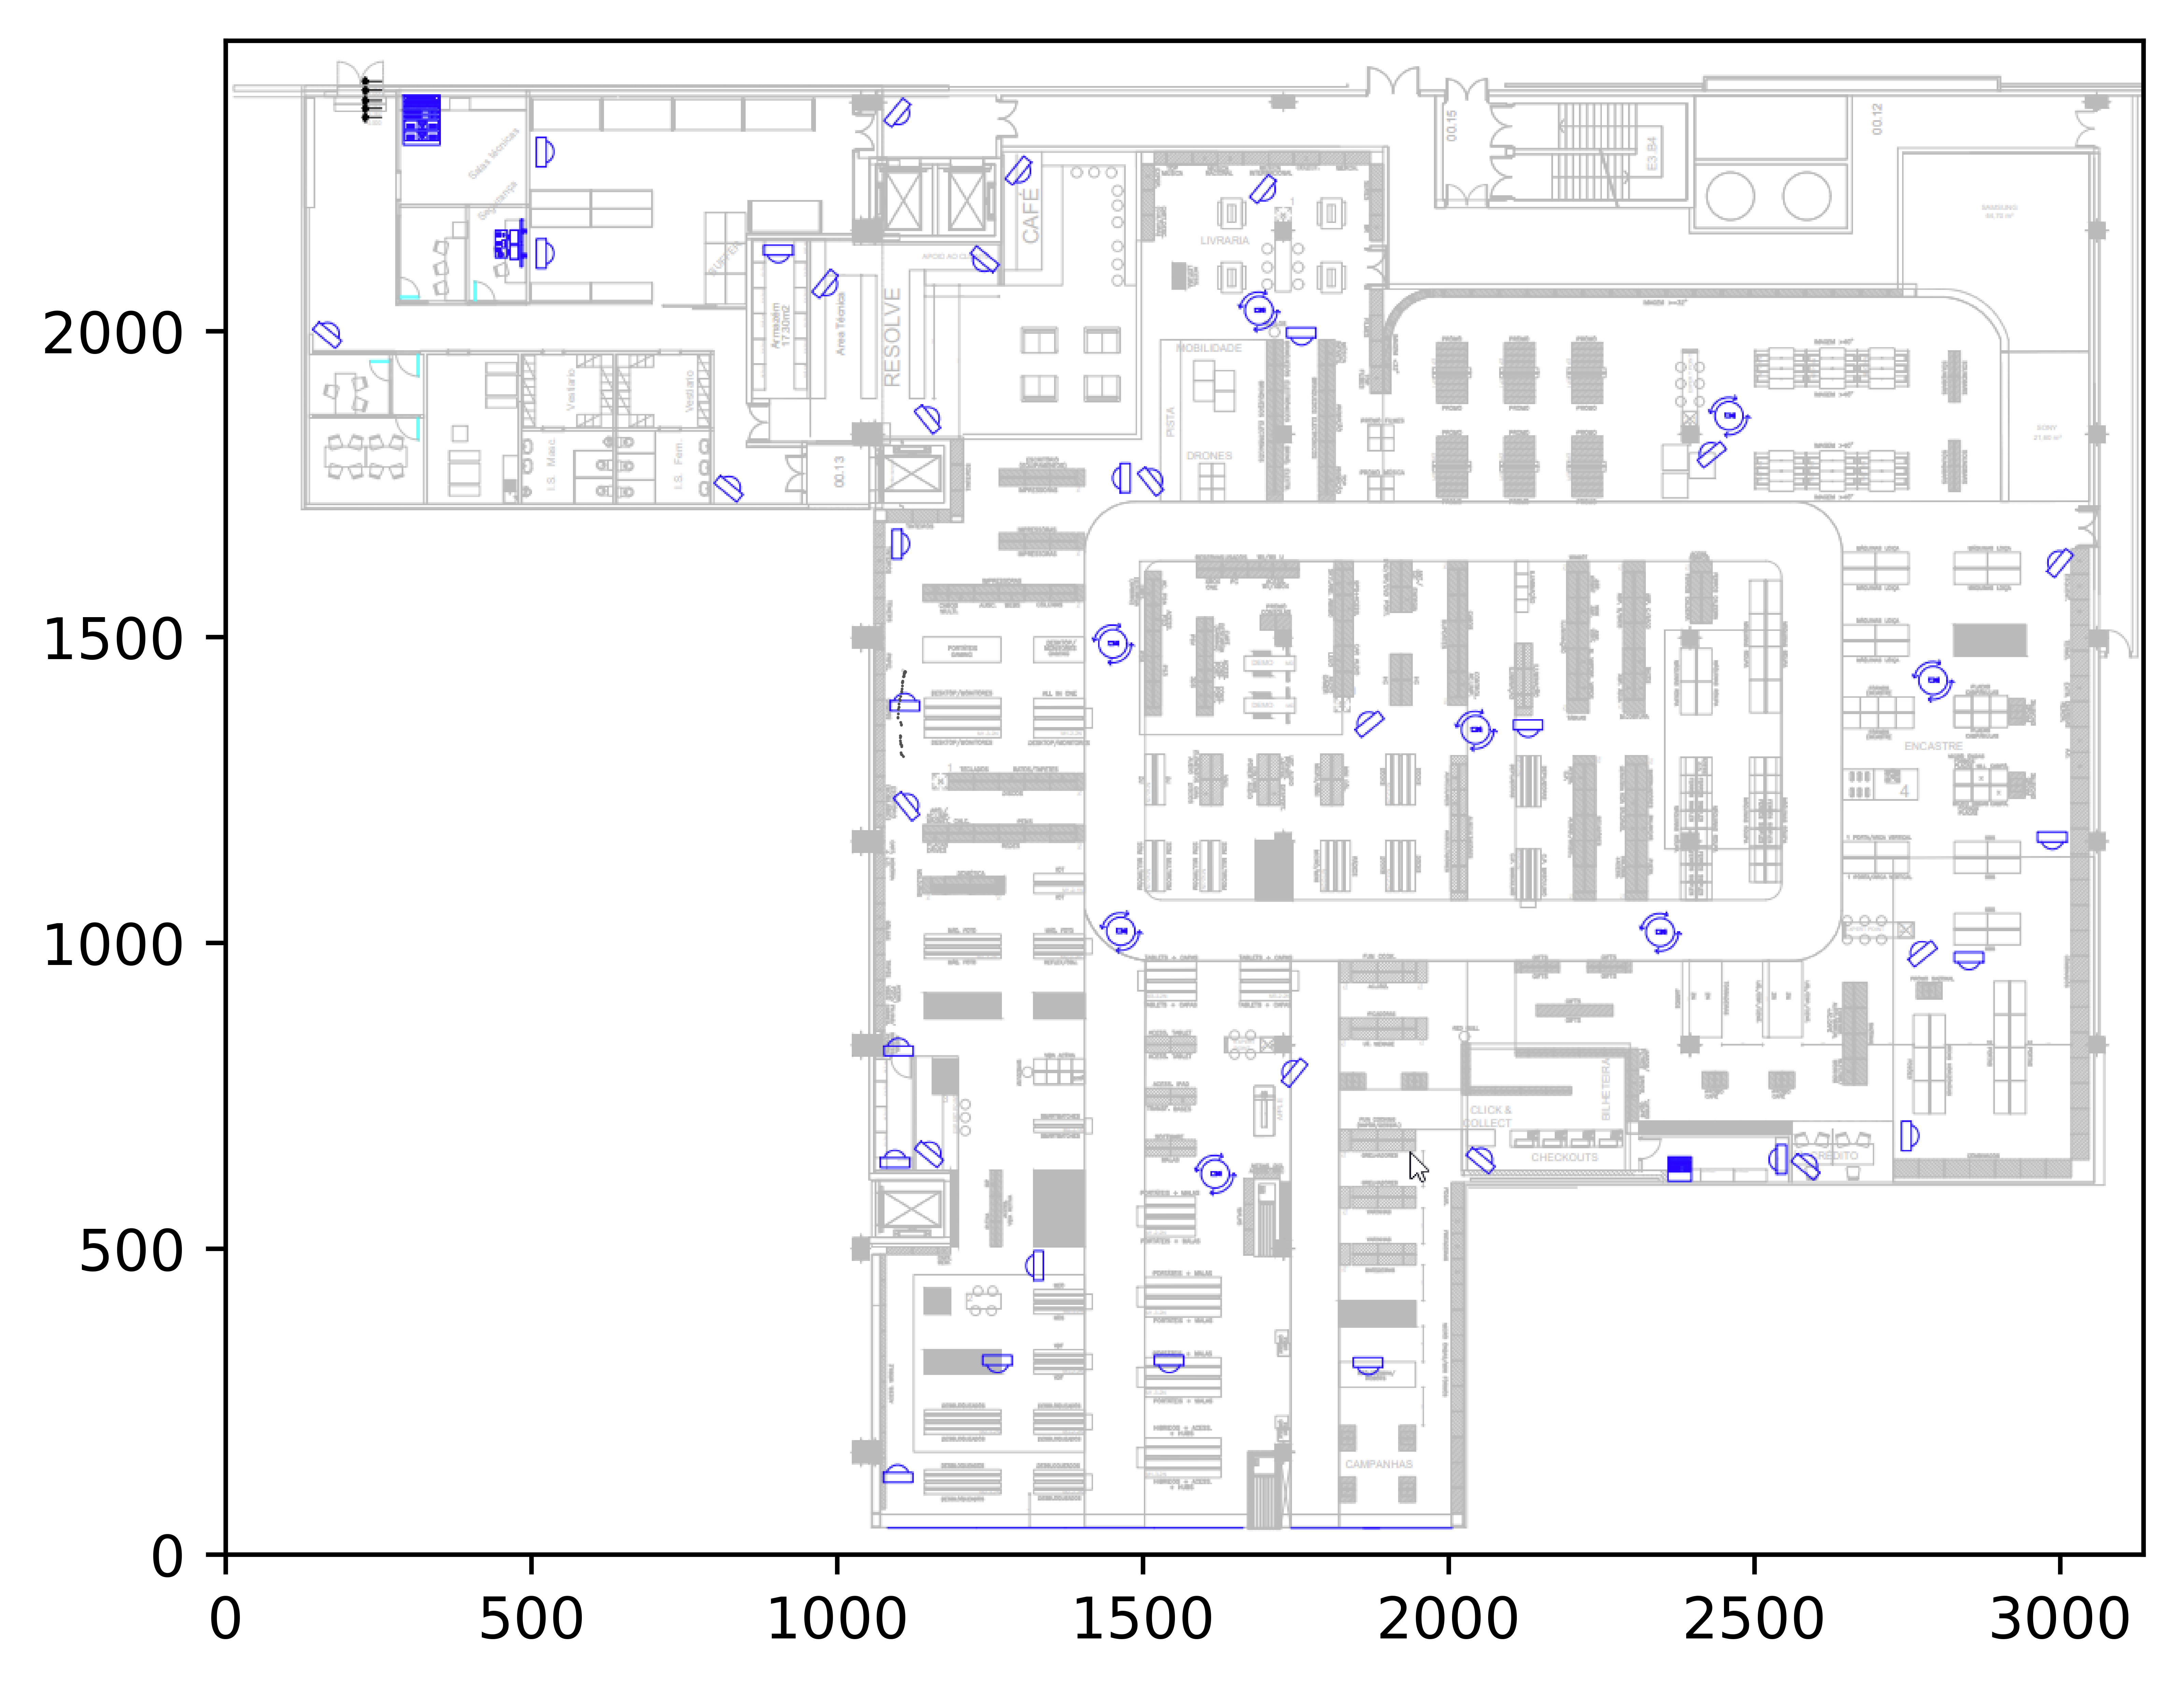

In [9]:
#data_by_time = get_data_by_time(df, "09:30:00", "09:31:00")
data_by_customer = get_data_by_customer(df, 31)
print(count_different_customers(data_by_customer))
print_trajectory_chronologically(data_by_customer)

### Exemplo 2

Para ver quando acaba a gravação da camara

Mais escuro -> mais recente<br>
Mais esboçado  -> mais antigo

In [7]:
data_by_time = get_data_by_time(df, "23:00:00", "23:30:00")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

194
1443 23:00:01 bbox coords: (346.0 620.0 493.0 719.0) camera: 1.04
1448 23:00:02 bbox coords: (346.0 622.0 493.0 719.0) camera: 1.04
1456 23:00:03 bbox coords: (340.0 620.0 494.0 719.0) camera: 1.04
1452 23:00:03 bbox coords: (344.0 621.0 494.0 719.0) camera: 1.04
1460 23:00:04 bbox coords: (338.0 618.0 496.0 719.0) camera: 1.04
1464 23:00:05 bbox coords: (334.0 616.0 496.0 719.0) camera: 1.04
1468 23:00:05 bbox coords: (332.0 614.0 497.0 719.0) camera: 1.04
1473 23:00:06 bbox coords: (337.0 615.0 500.0 718.0) camera: 1.04
1485 23:00:08 bbox coords: (345.0 612.0 512.0 718.0) camera: 1.04
71 23:00:12 bbox coords: (1059.0 215.0 1117.0 349.0) camera: 1.04
66 23:00:12 bbox coords: (1077.0 229.0 1128.0 346.0) camera: 1.04
1523 23:00:14 bbox coords: (719.0 486.0 872.0 714.0) camera: 1.04
1527 23:00:15 bbox coords: (717.0 490.0 869.0 714.0) camera: 1.04
1531 23:00:16 bbox coords: (714.0 490.0 867.0 716.0) camera: 1.04
1535 23:00:16 bbox coords: (709.0 489.0 865.0 715.0) camera: 1.04
1539 2

KeyboardInterrupt: 

### Exemplo 3

09:30:14 é a hora que aparece o primeiro ponto da trajetória da camara 1.03

mesmo assim, não corresponde ao momento do vídeo em que aparece a primeira pessoa porque a trajetória vai de cima para baixo.

5
1681 09:30:13 bbox coords: (173.0 298.0 258.0 476.0) camera: 1.03
1685 09:30:13 bbox coords: (175.0 296.0 260.0 473.0) camera: 1.03
1689 09:30:14 bbox coords: (181.0 296.0 266.0 471.0) camera: 1.03
1694 09:30:15 bbox coords: (186.0 300.0 271.0 472.0) camera: 1.03
1702 09:30:16 bbox coords: (190.0 291.0 282.0 473.0) camera: 1.03
1698 09:30:16 bbox coords: (188.0 296.0 276.0 471.0) camera: 1.03
1710 09:30:18 bbox coords: (191.0 292.0 284.0 474.0) camera: 1.03
2235 09:30:13 bbox coords: (254.0 340.0 335.0 508.0) camera: 1.04
2239 09:30:14 bbox coords: (259.0 336.0 342.0 507.0) camera: 1.04
2244 09:30:15 bbox coords: (278.0 328.0 374.0 526.0) camera: 1.04
2248 09:30:15 bbox coords: (290.0 324.0 393.0 537.0) camera: 1.04
581 09:30:13 bbox coords: (782.0 434.0 873.0 665.0) camera: 2.11
585 09:30:14 bbox coords: (809.0 447.0 918.0 728.0) camera: 2.11
583 09:30:14 bbox coords: (792.0 440.0 901.0 719.0) camera: 2.11
593 09:30:15 bbox coords: (933.0 473.0 1031.0 726.0) camera: 2.11
591 09:30:1

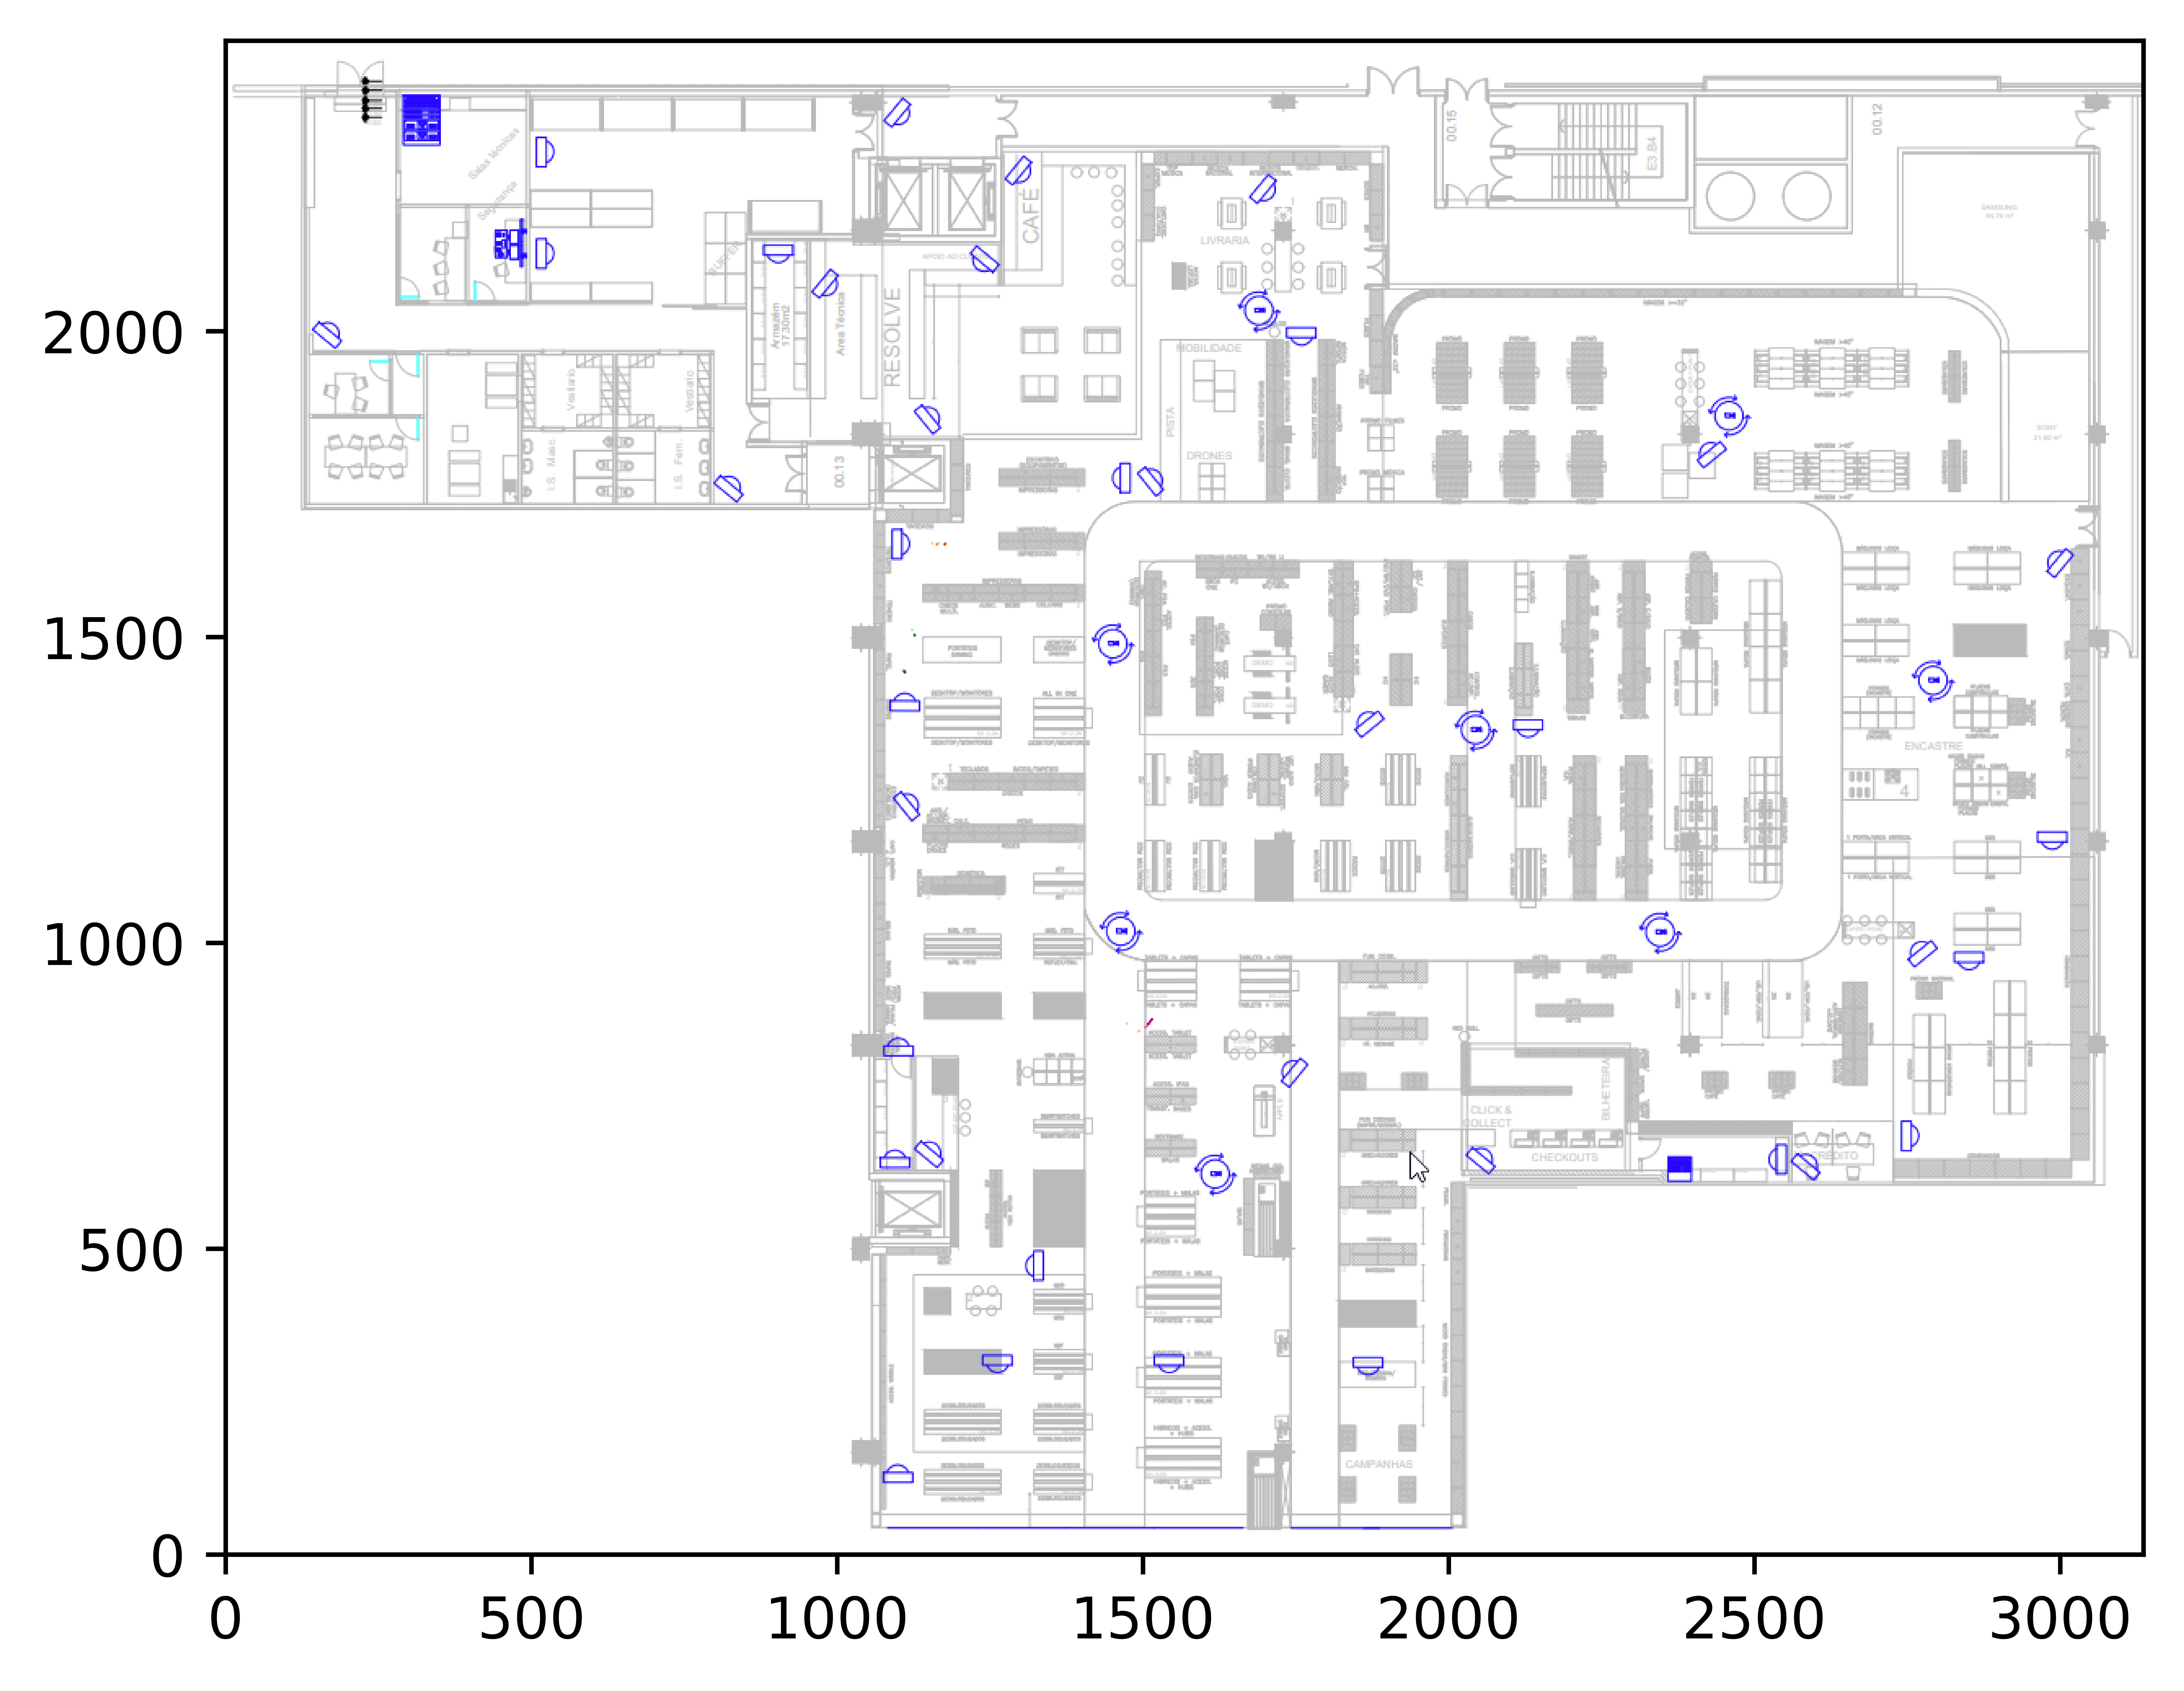

In [ ]:
data_by_time = get_data_by_time(df, "09:30:00", "09:30:20")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)

### Exemplo 4

os pontos de trajetória com início às 08:31:25 parecem corresponder à hora do vídeo 08:42:51 (isto para a câmara 1.04)

27
1964 08:03:57 bbox coords: (811.0 95.0 850.0 212.0) camera: 2.05
1969 08:03:58 bbox coords: (815.0 99.0 853.0 212.0) camera: 2.05
1973 08:03:58 bbox coords: (820.0 105.0 860.0 222.0) camera: 2.05
1977 08:03:59 bbox coords: (826.0 106.0 868.0 229.0) camera: 2.05
1981 08:04:00 bbox coords: (829.0 110.0 870.0 232.0) camera: 2.05
1985 08:04:00 bbox coords: (830.0 117.0 873.0 241.0) camera: 2.05
1989 08:04:01 bbox coords: (830.0 122.0 874.0 249.0) camera: 2.05
1994 08:04:02 bbox coords: (831.0 124.0 877.0 254.0) camera: 2.05
1998 08:04:03 bbox coords: (832.0 131.0 879.0 263.0) camera: 2.05
2002 08:04:03 bbox coords: (834.0 142.0 880.0 272.0) camera: 2.05
2006 08:04:04 bbox coords: (836.0 149.0 882.0 274.0) camera: 2.05
2010 08:04:05 bbox coords: (836.0 154.0 882.0 275.0) camera: 2.05
2014 08:04:05 bbox coords: (833.0 155.0 881.0 275.0) camera: 2.05
2019 08:04:06 bbox coords: (834.0 156.0 883.0 275.0) camera: 2.05
2023 08:04:07 bbox coords: (837.0 159.0 885.0 275.0) camera: 2.05
2027 08:0

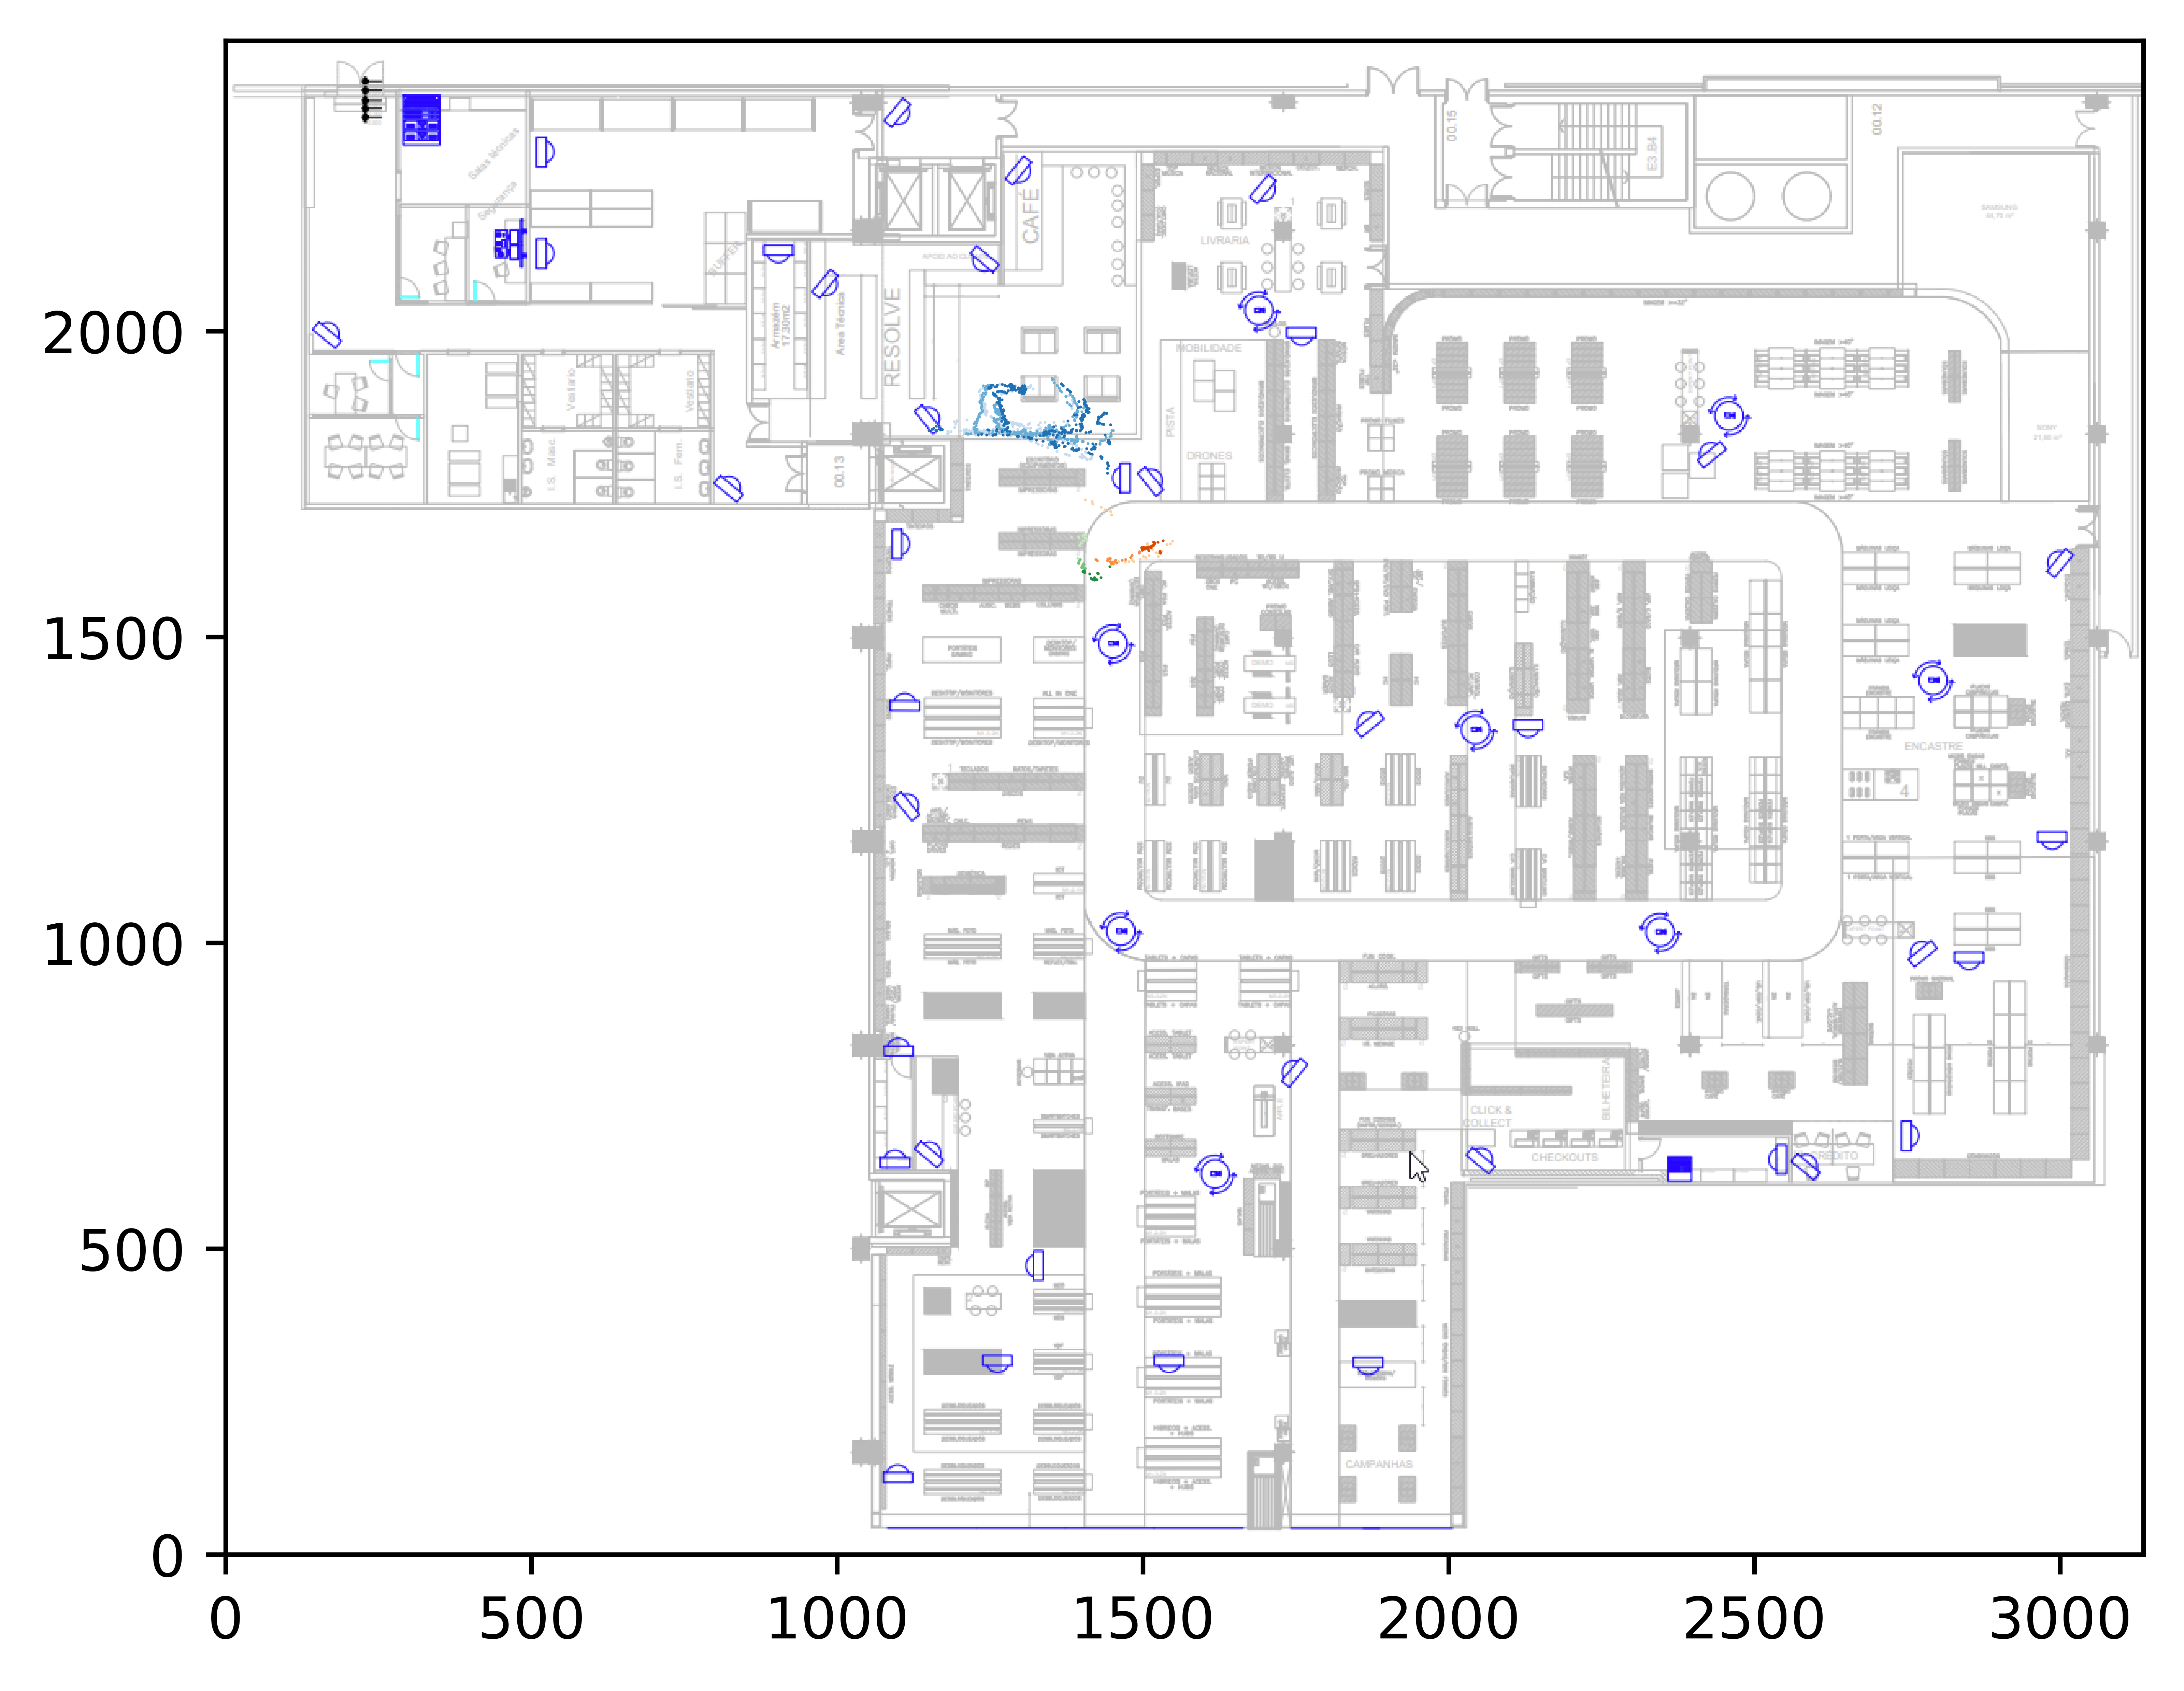

In [ ]:
data_by_time = get_data_by_time(df, "08:00:00", "08:30:00")
print(count_different_customers(data_by_time))
print_trajectory_chronologically(data_by_time)